In [3]:
import pandas as pd

# Define the file path and the specific columns to load
file_path = 'data/metadata.csv'
columns_to_load = [
    'title',
    'abstract',
    'publish_time',
    'journal',
    'authors'
]

# Load the CSV using the 'usecols' parameter for efficiency
df = pd.read_csv(file_path, usecols=columns_to_load)

# Display the first 5 rows to confirm it loaded correctly
df.head()

,title,abstract,publish_time,authors,journal
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res


In [2]:
# Check the DataFrame dimensions (rows, columns)
print(f"DataFrame Shape: {df.shape}")

# Identify data types and non-null counts
print("\n--- DataFrame Info ---")
df.info()

# Check for missing values
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

DataFrame Shape: (1056660, 5)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   title         1056157 non-null  object
 1   abstract      821116 non-null   object
 2   publish_time  1054846 non-null  object
 3   authors       1032791 non-null  object
 4   journal       969338 non-null   object
dtypes: object(5)
memory usage: 40.3+ MB

--- Missing Values per Column ---
title              503
abstract        235544
publish_time      1814
authors          23869
journal          87322
dtype: int64


In [ ]:
# Create a copy to ensure we don't modify the original loaded data
df_cleaned = df.copy()

# 1. Handle missing data by dropping rows with missing essential information
df_cleaned = df_cleaned.dropna(subset=['title', 'abstract', 'publish_time', 'journal'])

# 2. Convert the 'publish_time' column to a proper date format
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

# Drop any rows that failed the date conversion
df_cleaned = df_cleaned.dropna(subset=['publish_time'])

# 3. Extract the year into a new 'year' column
df_cleaned['year'] = df_cleaned['publish_time'].dt.year
df_cleaned['year'] = df_cleaned['year'].astype(int)

# Verify the result
print(f"Shape after cleaning: {df_cleaned.shape}")
df_cleaned[['title', 'journal', 'year']].head()

Shape after cleaning: (380295, 6)


In [4]:
# Make sure to import visualization libraries in a new cell
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a professional style for the plots
sns.set_style("whitegrid")


C:\Users\-\AppData\Local\Temp\ipykernel_11428\2731261082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=papers_by_year.index, y=papers_by_year.values, palette="viridis")


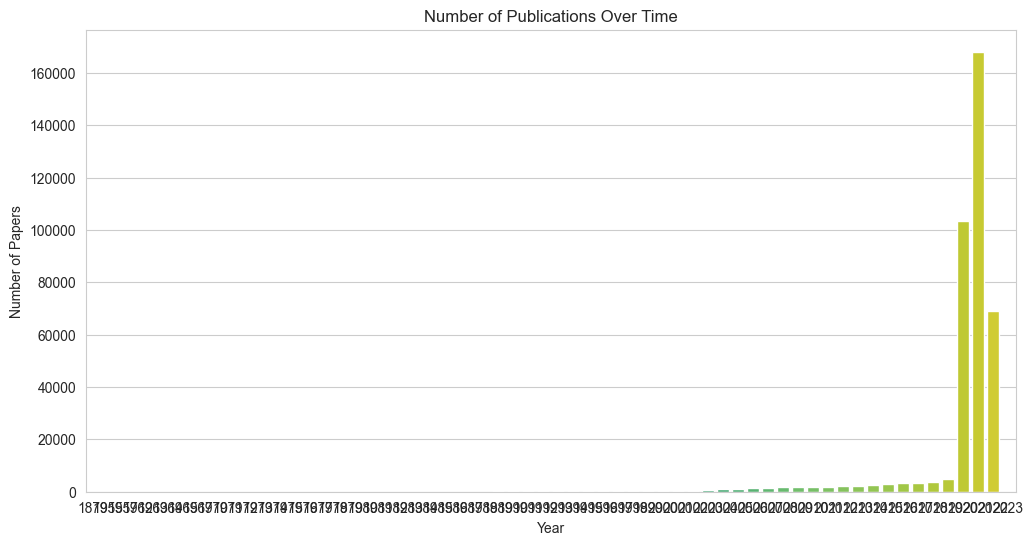

In [5]:
# Bar Chart: Number of Publications Over Time
papers_by_year = df_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=papers_by_year.index, y=papers_by_year.values, palette="viridis")
plt.title('Number of Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers');

C:\Users\-\AppData\Local\Temp\ipykernel_11428\2546670738.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette="mako")


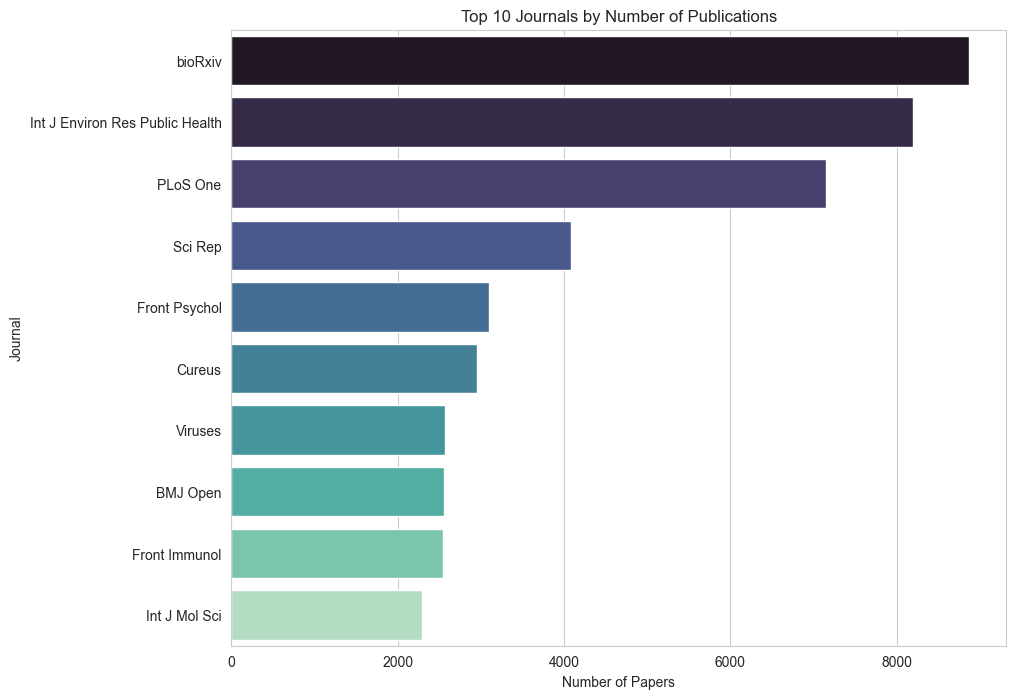

In [6]:
# Bar Chart: Top Publishing Journals
top_journals = df_cleaned['journal'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_journals.values, y=top_journals.index, palette="mako")
plt.title('Top 10 Journals by Number of Publications')
plt.xlabel('Number of Papers')
plt.ylabel('Journal');

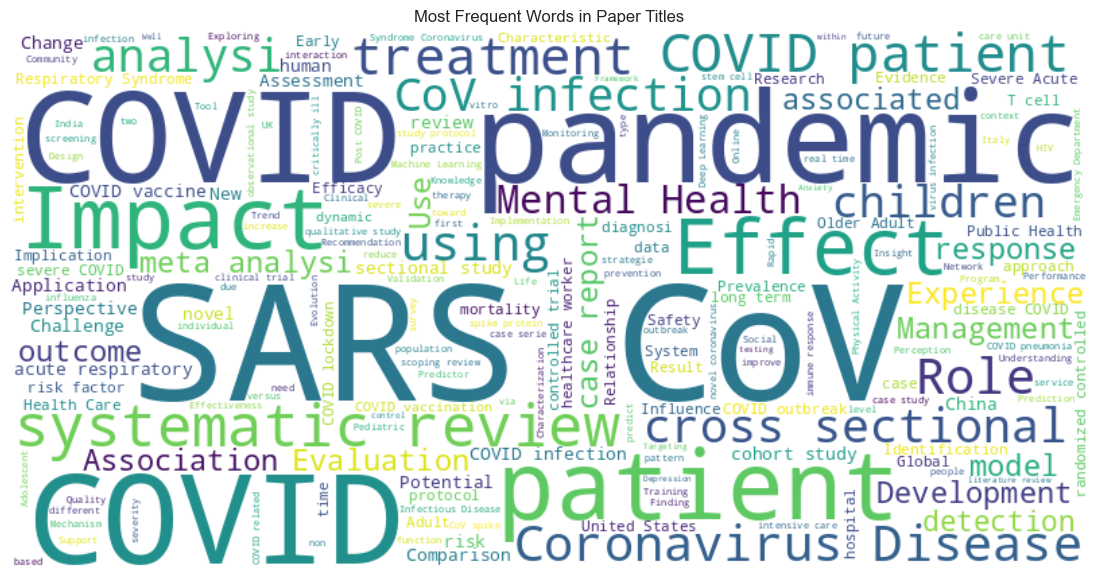

In [7]:
# Word Cloud: Most Frequent Words in Titles
all_titles = ' '.join(df_cleaned['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Paper Titles');

In [1]:
# This saves the smaller, cleaned DataFrame to a new file in your data folder
df_cleaned.to_csv('data/cleaned_metadata.csv', index=False)

NameError: name 'df_cleaned' is not defined